In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("org_test_results_sorted.csv")

In [4]:
df.head()

,name,password,best_pred_pass,avg_edit_dist,min_distance
0,jinkies_0@hotmail.com,jinkies,jinkies,3.246154,0
1,leonid-lebedev00@rambler.ru,leonid,leonid,3.622222,0
2,cheyen1@hotmail.fr,cheyen,cheyen,2.333333,0
3,niknak_niknak@aol.com,niknak,niknak,2.800000,0
4,ali-sel@mail.ru,alisel,alisel,2.929825,0


In [6]:
import re

def get_username_from_email(email):
    match = re.search(r'^([^@]+)@[^@]+$', email)
    if match:
        return match.group(1)
    return None

# Example usage
email = "jinkies_0@hotmail.com"
username = get_username_from_email(email)
print(f'Username: {username}')

Username: jinkies_0


In [8]:
!pip install python-Levenshtein

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.5 MB/s eta 0:00:00:00:0100:01


In [9]:
from Levenshtein import distance as lev
lev("123456", "123456")

0

In [10]:
from tqdm.notebook import tqdm
from joblib import Parallel, delayed

tqdm.pandas()

## Finding editing distance between username and password

In [13]:
def avg_and_min_edit_dist(email, actual_pass):
    username = get_username_from_email(email)
    return lev(str(username), str(actual_pass))

results = Parallel(n_jobs=-1, verbose=10)(delayed(avg_and_min_edit_dist)(row['name'], row['password']) for index, row in df.iterrows())
df['user_pass_min_dist'] = pd.DataFrame(results, index=df.index)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0242s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0225s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0384s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch com

In [14]:
df.head()

,name,password,best_pred_pass,avg_edit_dist,min_distance,user_pass_min_dist
0,jinkies_0@hotmail.com,jinkies,jinkies,3.246154,0,2
1,leonid-lebedev00@rambler.ru,leonid,leonid,3.622222,0,10
2,cheyen1@hotmail.fr,cheyen,cheyen,2.333333,0,1
3,niknak_niknak@aol.com,niknak,niknak,2.800000,0,7
4,ali-sel@mail.ru,alisel,alisel,2.929825,0,1


In [15]:
top_100_df = pd.read_csv("data/top_100_pass.csv")

In [16]:
top_100_df.head()

,password,count
0,123456,2034268
1,123456789,1214120
2,qwerty,988396
3,password,738200
4,12345,687856


In [22]:
top_100_pass = top_100_df['password'].tolist()

In [24]:
def avg_and_min_edit_dist(actual_pass):
    edit_distances = [lev(str(actual_pass), str(top_pass)) for top_pass in top_100_pass]
    avg_edit_dist = sum(edit_distances) / len(top_100_pass)
    min_distance = min(edit_distances)
    best_pred_pass = top_100_pass[edit_distances.index(min(edit_distances))]  
    return (best_pred_pass, avg_edit_dist, min_distance)

results = Parallel(n_jobs=-1, verbose=10)(delayed(avg_and_min_edit_dist)(row['password']) for index, row in df.iterrows())
df[['top_100_best_pass', 'top_100_avg_edit_dist', 'top_100_min_distance']] = pd.DataFrame(results, index=df.index)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1801s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0116s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0082s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0121s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch com

In [25]:
df.head()

,name,password,best_pred_pass,avg_edit_dist,min_distance,user_pass_min_dist,top_100_best_pass,top_100_avg_edit_dist,top_100_min_distance
0,jinkies_0@hotmail.com,jinkies,jinkies,3.246154,0,2,tinkle,7.35,3
1,leonid-lebedev00@rambler.ru,leonid,leonid,3.622222,0,10,19weed,6.90,5
2,cheyen1@hotmail.fr,cheyen,cheyen,2.333333,0,1,)ryan,6.77,4
3,niknak_niknak@aol.com,niknak,niknak,2.800000,0,7,)ryan,7.00,5
4,ali-sel@mail.ru,alisel,alisel,2.929825,0,1,abc123,6.73,5


## Plotting minimum distance

In [26]:
df.to_csv("data/org_test_results_final.csv", index=False)

In [29]:
df.columns

Index(['name', 'password', 'best_pred_pass', 'avg_edit_dist', 'min_distance',
       'user_pass_min_dist', 'top_100_best_pass', 'top_100_avg_edit_dist',
       'top_100_min_distance'],
      dtype='object')

In [30]:
df[['min_distance','user_pass_min_dist','top_100_min_distance']].head()

,min_distance,user_pass_min_dist,top_100_min_distance
0,0,2,3
1,0,10,5
2,0,1,4
3,0,7,5
4,0,1,5


In [31]:
counts = df[['min_distance','user_pass_min_dist','top_100_min_distance']].apply(pd.Series.value_counts).fillna(0)

In [32]:
counts

,min_distance,user_pass_min_dist,top_100_min_distance
0,6.0,153.0,471.0
1,41.0,103.0,115.0
2,128.0,64.0,175.0
3,334.0,73.0,536.0
4,894.0,108.0,1615.0
5,1754.0,206.0,2033.0
6,2407.0,520.0,2093.0
7,1809.0,887.0,1267.0
8,1124.0,1360.0,698.0
9,575.0,1274.0,322.0


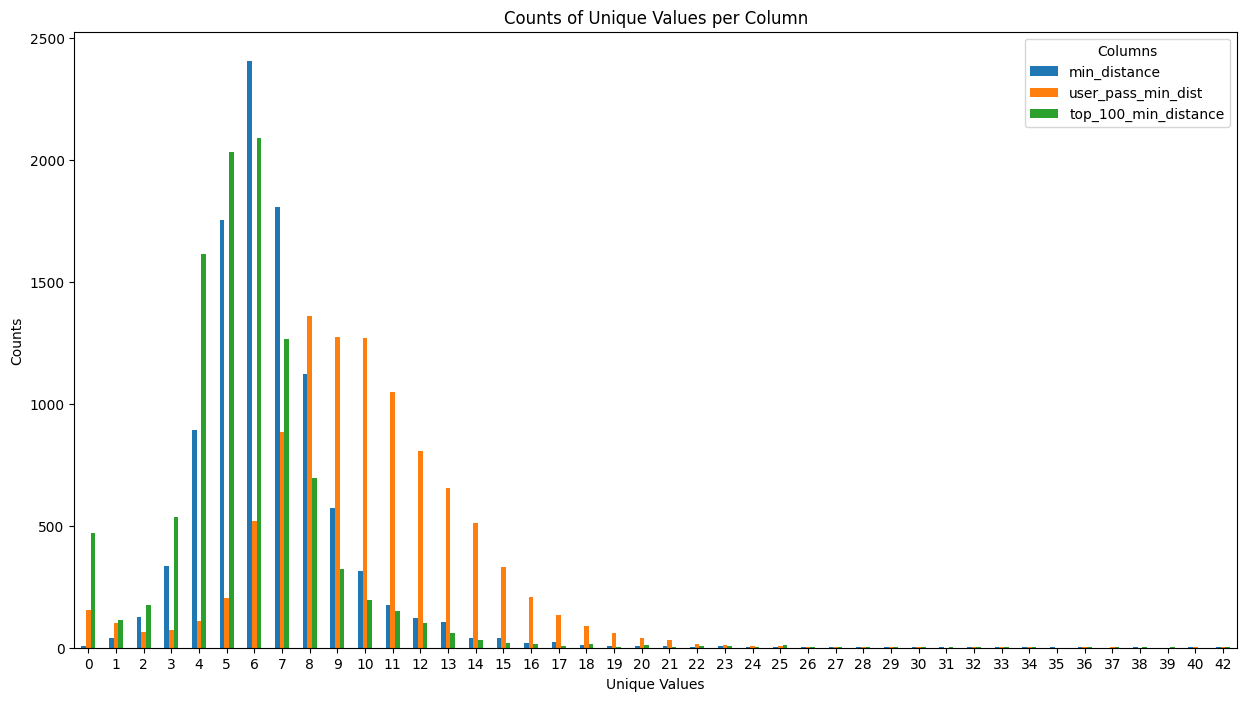

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
counts.plot(kind='bar', figsize=(15, 8))
plt.title('Counts of Unique Values per Column')
plt.xlabel('Unique Values')  # Corrected line
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keep the-tick labels readable
plt.legend(title='Columns')
plt.show()

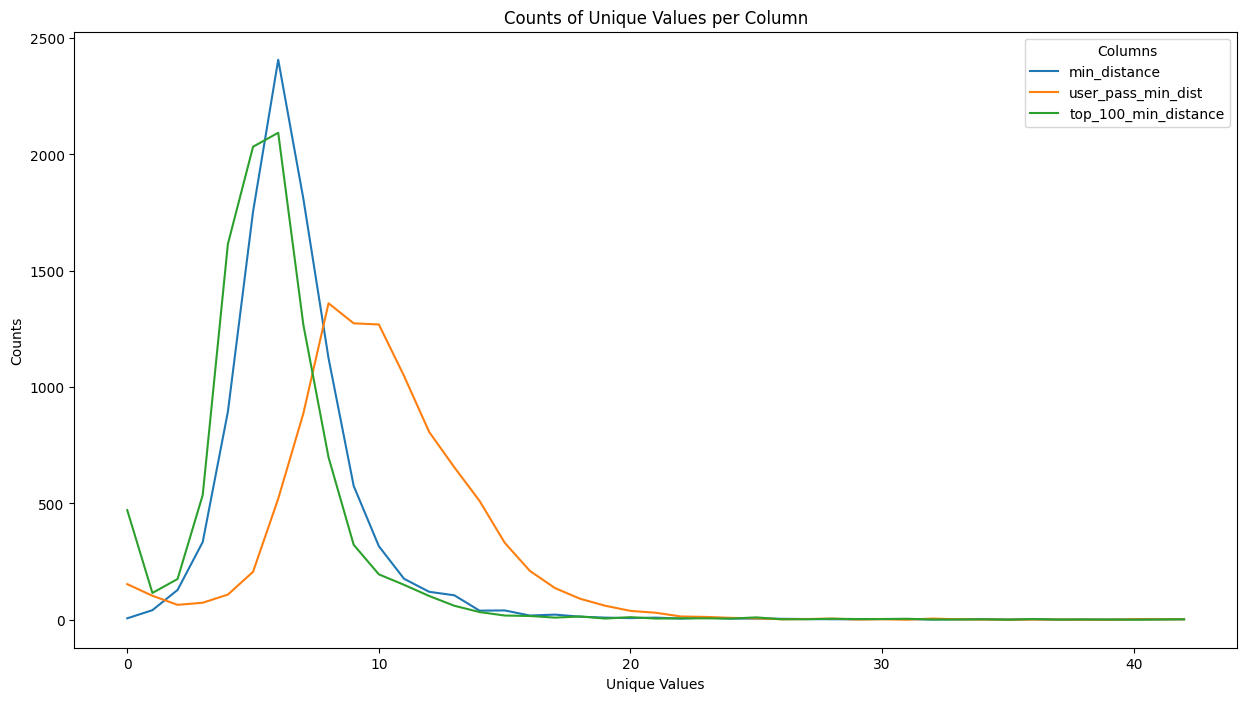

In [39]:
counts.plot(kind='line', figsize=(15, 8))
plt.title('Counts of Unique Values per Column')
plt.xlabel('Unique Values')  # Corrected line
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keep the-tick labels readable
plt.legend(title='Columns')
plt.show()

In [40]:
df[['avg_edit_dist','top_100_min_distance']].head()

,avg_edit_dist,top_100_min_distance
0,3.246154,3
1,3.622222,5
2,2.333333,4
3,2.800000,5
4,2.929825,5


Text(0.5, 1.0, 'Model Comparison')

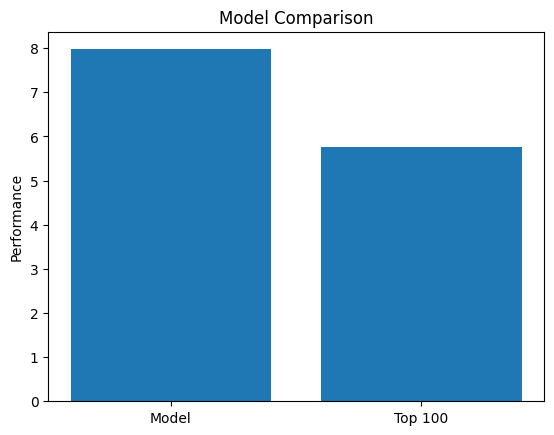

In [45]:
x = ['Model', 'Top 100']
y = [df['avg_edit_dist'].mean(), df['top_100_min_distance'].mean()] 

plt.bar(x, y)
plt.ylabel('Performance')
plt.title('Model Comparison')

In [54]:
df['avg_edit_dist'].min()

2.333333333333333

In [55]:
df['top_100_min_distance'].min()

0

In [47]:
df['avg_edit_dist'].max()

43.853932584269664

In [48]:
df['top_100_min_distance'].max()

42

In [66]:
df.head()

,name,password,best_pred_pass,avg_edit_dist,min_distance,user_pass_min_dist,top_100_best_pass,top_100_avg_edit_dist,top_100_min_distance,avg_edit_dist_bin,top_100_min_dist_bin
0,jinkies_0@hotmail.com,jinkies,jinkies,3.246154,0,2,tinkle,7.35,3,0-5,0-5
1,leonid-lebedev00@rambler.ru,leonid,leonid,3.622222,0,10,19weed,6.90,5,0-5,0-5
2,cheyen1@hotmail.fr,cheyen,cheyen,2.333333,0,1,)ryan,6.77,4,0-5,0-5
3,niknak_niknak@aol.com,niknak,niknak,2.800000,0,7,)ryan,7.00,5,0-5,0-5
4,ali-sel@mail.ru,alisel,alisel,2.929825,0,1,abc123,6.73,5,0-5,0-5


In [67]:
df['min_distance'].median()

6.0

In [68]:
df['user_pass_min_dist'].median()

10.0

In [72]:
df['top_100_min_distance'].median()

6.0

In [73]:
df.describe()

,avg_edit_dist,min_distance,user_pass_min_dist,top_100_avg_edit_dist,top_100_min_distance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.975304,6.687900,9.973000,8.557824,5.762200
std,2.806142,2.870874,3.777605,2.763216,3.122567
min,2.333333,0.000000,0.000000,5.490000,0.000000
25%,6.483424,5.000000,8.000000,7.100000,4.000000
50%,7.400000,6.000000,10.000000,7.900000,6.000000
75%,8.695846,8.000000,12.000000,9.190000,7.000000
max,43.853933,42.000000,42.000000,44.530000,42.000000


In [75]:
df['password'].str.len().describe()

count    9999.000000
mean        8.698170
std         3.270359
min         1.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        46.000000
Name: password, dtype: float64